# Employment Performance Rating


In [1]:
import pandas as pd

In [2]:
emp = pd.read_csv("Employee_Performance.csv")

# we have to check wether there is any null value 

In [3]:
emp.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

# For Label Encoding if required we have to check the object values and than fit transform it

In [4]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
EmpNumber                       1200 non-null object
Age                             1200 non-null int64
Gender                          1200 non-null object
EducationBackground             1200 non-null object
MaritalStatus                   1200 non-null object
EmpDepartment                   1200 non-null object
EmpJobRole                      1200 non-null object
BusinessTravelFrequency         1200 non-null object
DistanceFromHome                1200 non-null int64
EmpEducationLevel               1200 non-null int64
EmpEnvironmentSatisfaction      1200 non-null int64
EmpHourlyRate                   1200 non-null int64
EmpJobInvolvement               1200 non-null int64
EmpJobLevel                     1200 non-null int64
EmpJobSatisfaction              1200 non-null int64
NumCompaniesWorked              1200 non-null int64
OverTime                        1200 non-null object
E

In [5]:
import numpy as np
import matplotlib.pyplot as plt


# Seaborn for Statistical Visualisation and we are checking correlation to avoid overfitting and feature selection 

In [6]:
import seaborn as sns

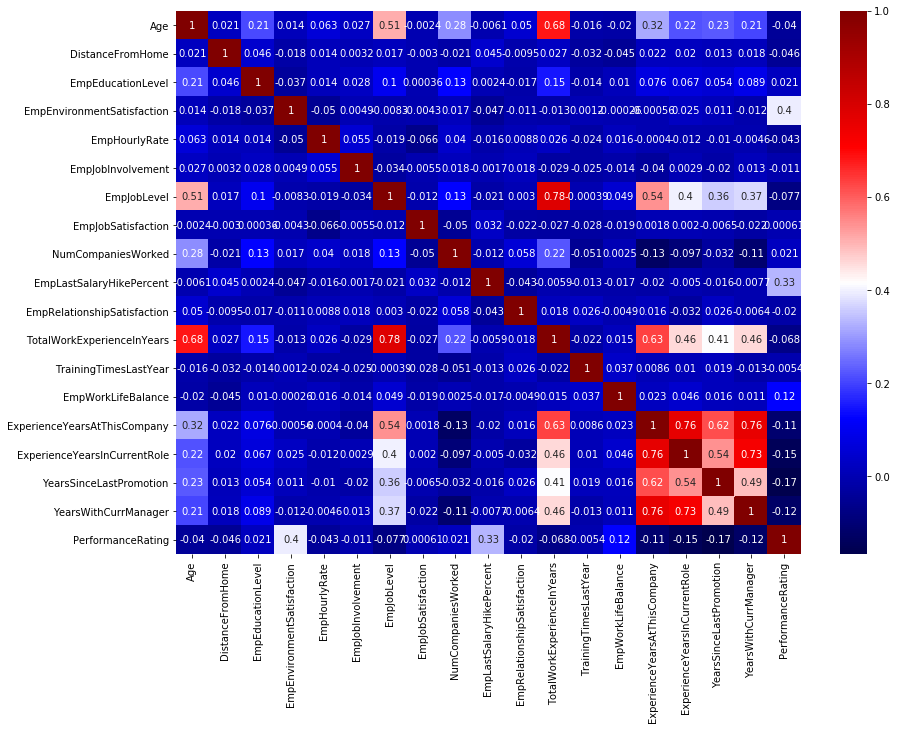

In [7]:
plt.figure(figsize=(14,10))
sns.heatmap(emp.corr(),annot=True,cmap='seismic')

# Importing Splitting function from sklearn package

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [10]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
EmpNumber                       1200 non-null object
Age                             1200 non-null int64
Gender                          1200 non-null object
EducationBackground             1200 non-null object
MaritalStatus                   1200 non-null object
EmpDepartment                   1200 non-null object
EmpJobRole                      1200 non-null object
BusinessTravelFrequency         1200 non-null object
DistanceFromHome                1200 non-null int64
EmpEducationLevel               1200 non-null int64
EmpEnvironmentSatisfaction      1200 non-null int64
EmpHourlyRate                   1200 non-null int64
EmpJobInvolvement               1200 non-null int64
EmpJobLevel                     1200 non-null int64
EmpJobSatisfaction              1200 non-null int64
NumCompaniesWorked              1200 non-null int64
OverTime                        1200 non-null object
E

# Allocating Predictors and Target Values



In [11]:
x = emp.loc[:,'Age':'Attrition']
y = emp.PerformanceRating


In [12]:
x.shape

(1200, 26)

In [13]:
emp.shape

(1200, 28)

# Using Label encoder and Dummy values 

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
enc = LabelEncoder()

In [16]:
x.EmpDepartment

0                 Sales
1                 Sales
2                 Sales
3       Human Resources
4                 Sales
5           Development
6                 Sales
7           Development
8           Development
9           Development
10          Development
11                Sales
12                Sales
13                Sales
14          Development
15          Development
16      Human Resources
17          Development
18          Development
19          Development
20                Sales
21          Development
22          Development
23          Development
24          Development
25                Sales
26          Development
27                Sales
28                Sales
29          Development
             ...       
1170        Development
1171        Development
1172        Development
1173    Human Resources
1174              Sales
1175              Sales
1176              Sales
1177        Development
1178        Development
1179        Development
1180        Deve

In [17]:
x.Gender = enc.fit_transform(x.Gender)
x.MaritalStatus=enc.fit_transform(x.MaritalStatus)
x.BusinessTravelFrequency=enc.fit_transform(x.BusinessTravelFrequency)
x.OverTime=enc.fit_transform(x.OverTime)

In [18]:
x.Attrition=enc.fit_transform(x.Attrition)

In [19]:
jbrl = pd.get_dummies(x['EmpJobRole'],drop_first=True)
x=pd.concat([x,jbrl],axis=1)

In [20]:
x.shape

(1200, 44)

# Synthetic Minority Over-sampling Technique(SMOTE) for Sampling the Data

In [28]:
x = x.drop(['EmpJobRole'],axis = 1)

In [29]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 43 columns):
Age                             1200 non-null int64
Gender                          1200 non-null int64
EducationBackground             1200 non-null object
MaritalStatus                   1200 non-null int64
EmpDepartment                   1200 non-null object
BusinessTravelFrequency         1200 non-null int64
DistanceFromHome                1200 non-null int64
EmpEducationLevel               1200 non-null int64
EmpEnvironmentSatisfaction      1200 non-null int64
EmpHourlyRate                   1200 non-null int64
EmpJobInvolvement               1200 non-null int64
EmpJobLevel                     1200 non-null int64
EmpJobSatisfaction              1200 non-null int64
NumCompaniesWorked              1200 non-null int64
OverTime                        1200 non-null int64
EmpLastSalaryHikePercent        1200 non-null int64
EmpRelationshipSatisfaction     1200 non-null int64
TotalWo

In [30]:
edpt = pd.get_dummies(x['EmpDepartment'],drop_first=True)
x = pd.concat([x,edpt],axis =1)

In [31]:
x = x.drop(['EmpDepartment'],axis =1)

In [35]:
edbg=pd.get_dummies(x['EducationBackground'],drop_first=True)
x = pd.concat([x,edbg],axis = 1)
x = x.drop(['EducationBackground'],axis =1)

In [36]:
x.shape

(1200, 51)

# Splitting Dataset into Train and Test

In [210]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3,random_state = 101)

# We have used Random Forest Classifier and No of trees in the forest = 100

In [211]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200,random_state=101)

In [212]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=101, verbose=0, warm_start=False)

# Assigning RandomForestClassifier predictor to y_pred

In [213]:
y_pred = rfc.predict(x_test)

In [214]:
from sklearn.metrics import accuracy_score


In [215]:
accuracy_score(y_pred,y_test)*100

92.22222222222223

In [216]:
confusion_matrix(y_test,y_pred)

array([[ 42,  10,   0],
       [  6, 268,   2],
       [  0,  10,  22]], dtype=int64)

In [217]:
from sklearn.decomposition import PCA

In [218]:
pca = PCA()

In [219]:
x_pca = pca.fit_transform(x)

In [220]:
pca.explained_variance_ratio_.sum()

1.0

In [190]:
comps = pd.DataFrame(pca.explained_variance_,index = x.columns)

In [163]:
comps.head(30)

,0
Age,409.055152
Gender,142.122623
MaritalStatus,66.805513
BusinessTravelFrequency,48.688022
DistanceFromHome,14.985773
EmpEducationLevel,13.114500
EmpEnvironmentSatisfaction,6.099631
EmpHourlyRate,5.467071
EmpJobInvolvement,4.045943
EmpJobLevel,3.429956


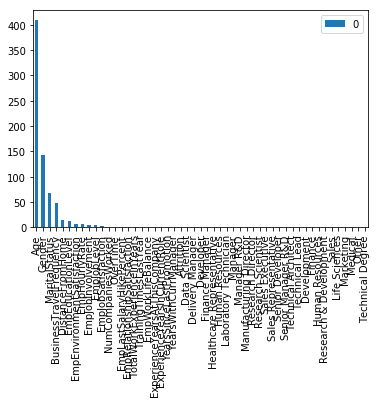

In [167]:
comps.plot(kind='bar')

In [170]:
x_train,x_test,y_train,y_test = train_test_split(x_pca,y, test_size = 0.3,random_state = 101)

In [169]:
rfc = RandomForestClassifier(n_estimators=200,random_state=100)

In [174]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [175]:
y_pred_pca =rfc.predict(x_test)

# We are not able to use PCA because there is no correlation amongst the independent features selected in x there by showing less accuracy

In [176]:
accuracy_score(y_test,y_pred_pca)

0.8388888888888889

In [177]:
confusion_matrix(y_test,y_pred_pca)

array([[  8,  41,   3],
       [  0, 272,   4],
       [  1,   9,  22]], dtype=int64)